In [1]:
!pip install keras
import numpy as np 
import pandas as pd 
import seaborn as sns
#import missingno as mg 
from matplotlib import pyplot as plt
from sklearn import preprocessing 
import re
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from matplotlib import*


#  Data Modelling Libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

from sklearn.metrics import (confusion_matrix, accuracy_score) 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
from collections import Counter
sns.set(style = 'white' , context = 'notebook', palette = 'deep')
warnings.filterwarnings('ignore', category = DeprecationWarning)

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
import pandas as pd
from pylab import rcParams
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import preprocessing,tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import sklearn.model_selection
import sklearn.tree
import sklearn.ensemble
import sklearn.metrics
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [2]:
train_data=pd.read_csv("Telco-Customer-Churn.csv", sep=";")
test_data=pd.read_csv("Telco-Customer-Churn-test.csv", sep=";")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
train_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Her özellik için unique değerlere bakılır:

In [5]:
for i in train_data.columns:
    print(f"Unique {i}'s count: {train_data[i].nunique()}")
    print(f"{train_data[i].unique()}\n")

Unique customerID's count: 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique gender's count: 2
['Female' 'Male']

Unique SeniorCitizen's count: 2
[0 1]

Unique Partner's count: 2
['Yes' 'No']

Unique Dependents's count: 2
['No' 'Yes']

Unique tenure's count: 73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique PhoneService's count: 2
['No' 'Yes']

Unique MultipleLines's count: 3
['No phone service' 'No' 'Yes']

Unique InternetService's count: 3
['DSL' 'Fiber optic' 'No']

Unique OnlineSecurity's count: 3
['No' 'Yes' 'No internet service']

Unique OnlineBackup's count: 3
['Yes' 'No' 'No internet service']

Unique DeviceProtection's count: 3
['No' 'Yes' 'No internet service']

Unique TechSupport's count: 3
['No' 'Yes' 'No internet service']

Unique StreamingTV's

Sınıflandırma için veriler incelenir, kayıp değerlere bakılır:

In [6]:
train_data["TotalCharges"]=pd.to_numeric(train_data["TotalCharges"], errors='coerce')

def feature_float(feature_list, train_data):
    for i in feature_list:
        train_data[i]=train_data[i].astype(float)
    return train_data

feature_float(['tenure'], train_data)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62.0,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [7]:
payment_column={'Electronic check':'E-Check', 'Mailed check':'Mailed Check',
               'Bank transfer (automatic)':'Bank Transfer', 'Credit card (automatic)':'Credit card'}
train_data["PaymentMethod"].replace(payment_column, inplace=True)

In [8]:
train_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

"TotalCharges" için missing data sayısı 11 olduğu için basitleştirmek için ilgili veri girişleri silinecektir.

In [9]:
train_data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Veri Keşfi

In [10]:
plt.style.use("fivethirtyeight")

Müşterinin geri dönüp dönmeme oranı incelenir:

<function matplotlib.pyplot.show(close=None, block=None)>

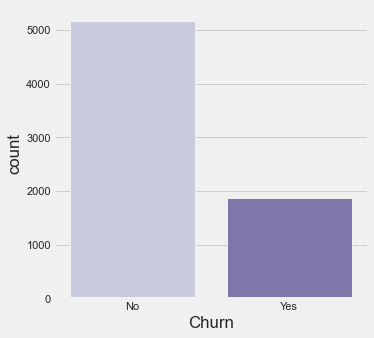

In [11]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=train_data['Churn'], palette="Purples", linewidth=1)
plt.show

Dengeli bir dağılım değildir.

In [12]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


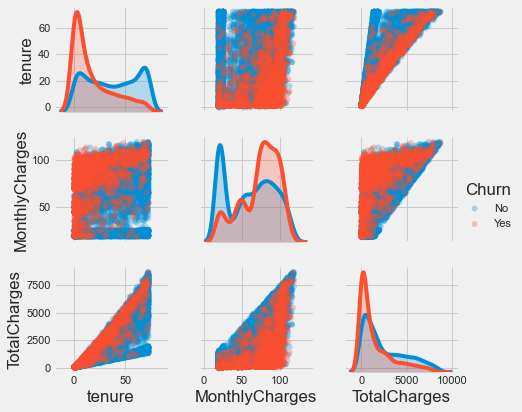

In [13]:

sns.pairplot(train_data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], 
             hue='Churn', plot_kws=dict(alpha=.3, edgecolor='none'), height=2, aspect=1.1)

array([<AxesSubplot:title={'center':'MonthlyCharges'}>,
       <AxesSubplot:title={'center':'TotalCharges'}>,
       <AxesSubplot:title={'center':'tenure'}>], dtype=object)

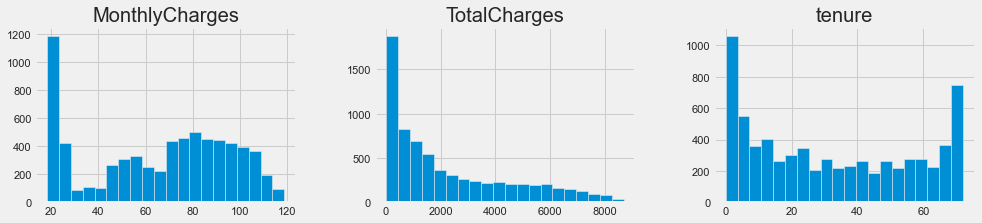

In [14]:
train_cols=['tenure', 'MonthlyCharges', 'TotalCharges']
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
train_data[train_cols].hist(bins=20, figsize=(10, 7), ax=ax)

In [15]:
correlation = train_data.corr()
print(correlation)

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.102411
tenure               0.016567  1.000000        0.247900      0.825880
MonthlyCharges       0.220173  0.247900        1.000000      0.651065
TotalCharges         0.102411  0.825880        0.651065      1.000000


<AxesSubplot:>

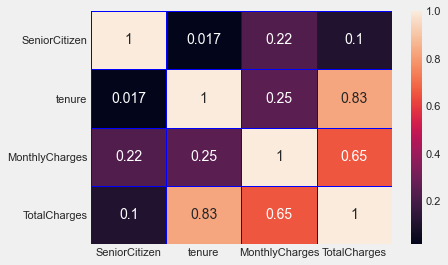

In [16]:
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

In [17]:
plots={1:[111], 2:[121,122], 3:[131,132,133], 4:[221,222,223,224], 5:[231,232,233,234,235], 6:[231,232,233,234,235,235]}

def boxplot(x,y, train_data):
    
    rows=int(str(plots[len(y)][0])[0])
    columns=int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax= sns.boxplot(x=x, y=j, data=train_data[[x, j]], palette="Purples", linewidth=1)
        ax.set_title(j)
        
        
    return plt.show()
        
        

Geri dönen müşterilerin(Churn=Yes) kullanım süresi yaklaşık 10 ay, geri dönmeyen müşterilerin(Churn=No) kullanım süreleri yaklaşık 40 ay.
Geri dönen müşterilerin(Churn=Yes) aylık ücretleri yaklaşık 80 USD, geri dönmeyen müşterilerin(Churn=No) aylık ücretleri yaklaşık 65 USD.
Geri dönen müşterilerin(Churn=Yes) toplam ücreti, geri dönmeyen müşterilerin(Churn=No) toplam ücretinden daha düşük.

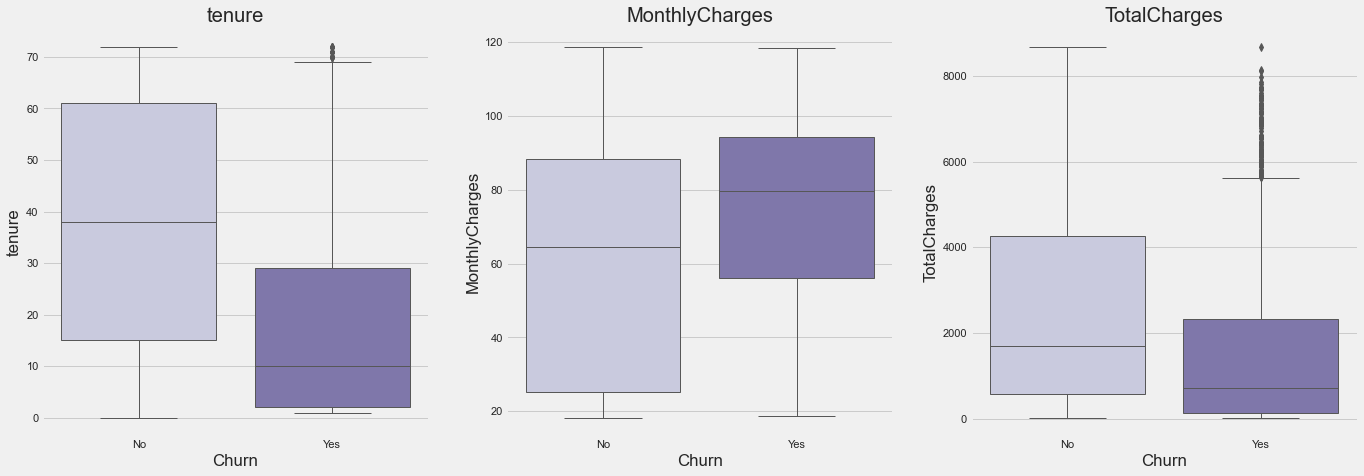

In [18]:
boxplot("Churn", ["tenure", "MonthlyCharges", "TotalCharges"], train_data)

In [19]:
def countplot(x,y, train_data):
    rows= int(str(plots[len(y)][0])[0])
    columns=int(str(plots[len(y)][0])[1])
    
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i,j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        
        ax=sns.countplot(x=j, hue=x, data=train_data, palette="Purples", alpha=0.8, linewidth=0.4, edgecolor="black")
        
        ax.set_title(j)
        
    return plt.show()

Müşterilerin geri dönüp dönmemesi (Churn=Yes, Churn=No) açısından kıyaslandığında:
    yaşlı müşterilerin kaybedilme oranı, genç olanlara göre daha yüksek.
    aydan aya sözleşmeler için kayıp oranı, diğer sözleşme sürelerine göre çok daha yüksek
    partneri olmayan müşterilerin kaybedilme oranı daha yüksek.
    çocuksuz müşterilerdeki kayıp oranı daha yüksek.
    InternetService fiber optik kullanan müşteriler çok daha yüksek kayıp oranına sahip.

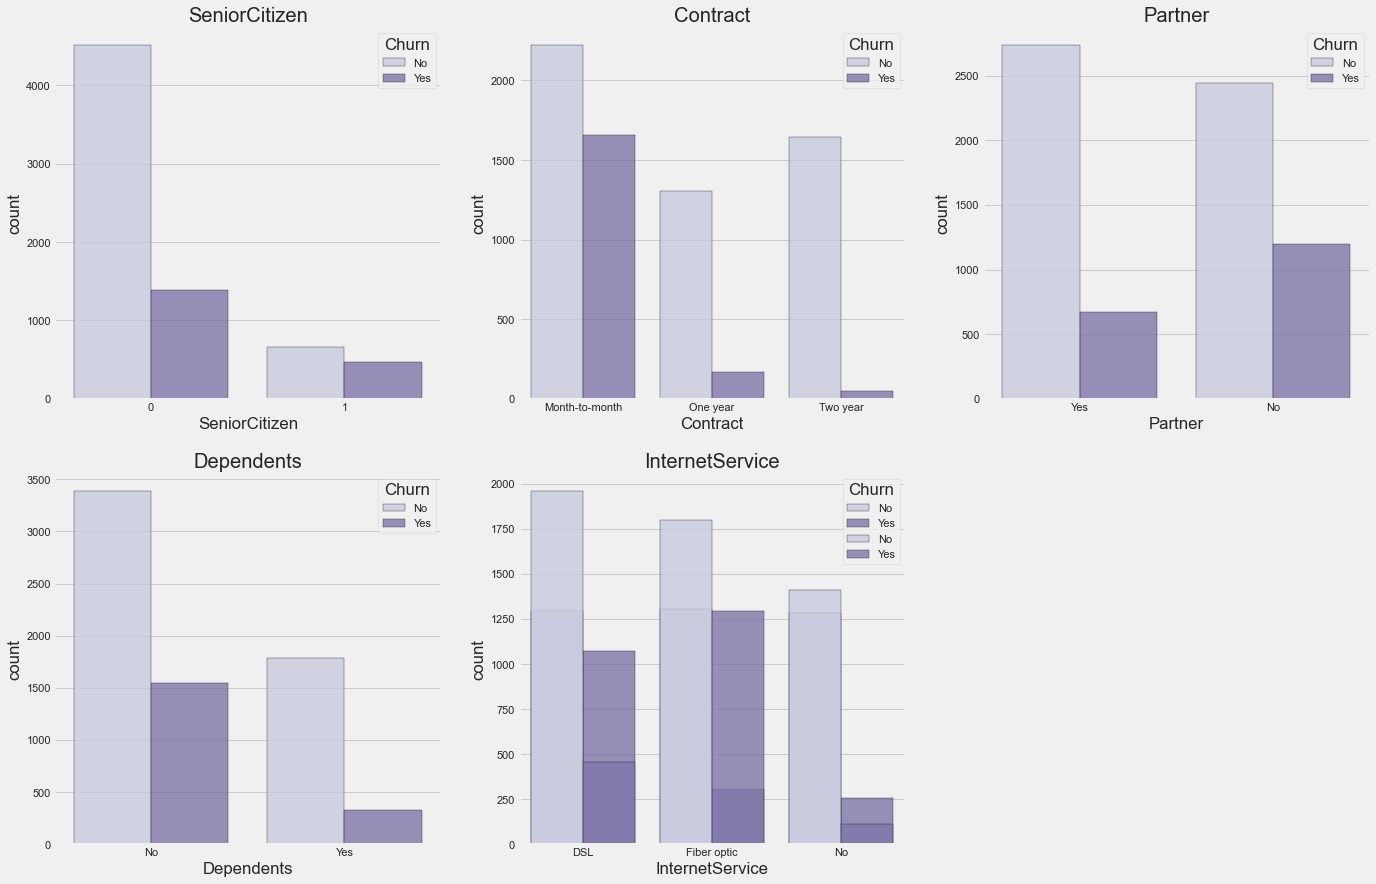

In [20]:
countplot("Churn", ['SeniorCitizen', 'Contract', 'Partner', 'Dependents', 'PaymentMethod', 'InternetService'], train_data)

## Aykırı değerlerin kontrolü

In [21]:
numerical_features=["tenure", "MonthlyCharges", "TotalCharges"]
train_data_num=train_data[numerical_features]
train_data_num.describe()

Q1=train_data_num.quantile(0.25)
Q3=train_data_num.quantile(0.75)
IQR=Q3-Q1
IQR
((train_data_num < (Q1 - 1.5*IQR)) | (train_data_num > (Q3 + 1.5*IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

## Veri temizleme

In [22]:
train_data=train_data.dropna()

## Özellik Mühendisliği

müşteri kimliği alakalı olmadığı için datadan kaldırıldı.

In [23]:
train_data=train_data.drop(columns="customerID")

In [24]:
train_data["Number_AdditionalServices"] = (train_data[["OnlineSecurity", "DeviceProtection", "StreamingMovies", "TechSupport", "StreamingTV", "OnlineBackup"]] == "Yes").sum(axis=1)

Sahip olduğu ek hizmet sayısı arttıkça, müşterilerin kaybedilme oranı düşmekte.

<AxesSubplot:xlabel='Number_AdditionalServices', ylabel='count'>

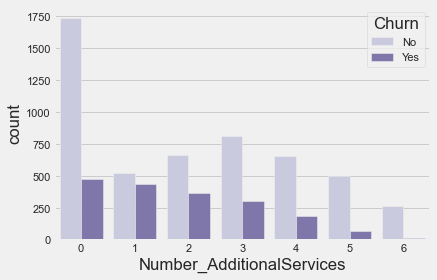

In [25]:

sns.countplot(data = train_data, hue = 'Churn', x=train_data["Number_AdditionalServices"], palette="Purples")

Label Encoding

In [26]:
features_le=["gender", "Partner", "Dependents", "Churn", "PhoneService", "PaperlessBilling"]

def label_encoding(features, train_data):
    for i in features:
        train_data[i]= train_data[i].map({"Yes":1, "No":0})
    return


label_encoding(["Partner", "Dependents", "Churn", "PhoneService", "PaperlessBilling"], train_data)

train_data["gender"]= train_data["gender"].map({"Female":1, "Male":0})

One-Hot-Encoding

In [27]:
features_ohe=["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
             "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod", "Number_AdditionalServices"]

train_data= pd.get_dummies(train_data, columns=features_ohe)

Feature Rescaling: Min-Max-Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler

features_mms=["tenure", "MonthlyCharges", "TotalCharges"]
train_data_features_mms= pd.DataFrame(train_data, columns=features_mms)
train_data_remaining_features= train_data.drop(columns=features_mms)

mms=MinMaxScaler()
rescaled_features=mms.fit_transform(train_data_features_mms)

train_data_rescaled_features= pd.DataFrame(rescaled_features, columns=features_mms, index=train_data_remaining_features.index)

train_data=pd.concat([train_data_remaining_features, train_data_rescaled_features], axis=1)

Correlation analysis

<AxesSubplot:>

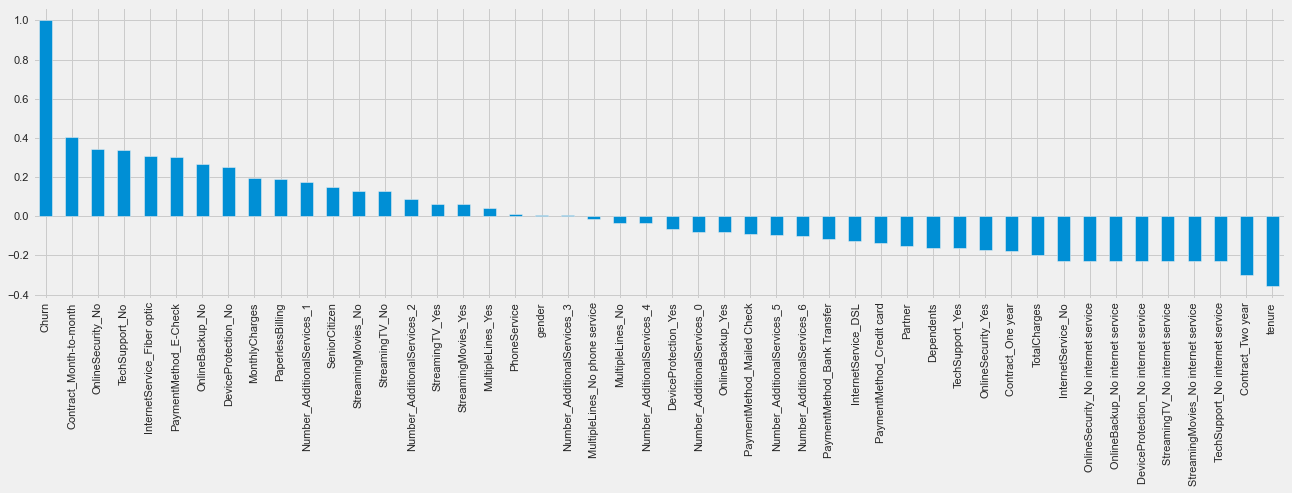

In [29]:
plt.figure(figsize=(16,10))
train_data.corr()['Churn'].sort_values(ascending=False).plot(kind="bar", figsize=(20,5))

## Train-Test-Split

Train ve test adımlarının yürütülmesi için, veri seti %80 train ve %20 test olarak bölünmüştür. "Churn" sütunu("y"), geri kalan özellikler("X") olarak tanımlanır.

In [30]:
from sklearn.model_selection import train_test_split

X1= train_data.drop("Churn", axis=1)
X=X1.values
y=train_data["Churn"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Evaluation Metrics

Özellik ağırlıkları: Tahminleri oluşturmak için train tarafından kullanılan en önemli özellikleri gösterir.

Karışıklık matrisi: Gerçek değerlere kıyasla doğru ve yanlış tahminlerden oluşan bir ızgara gösterir.

Doğruluk puanı: Eğitim seti ve test seti için modelin genel doğruluğunu gösterir.

ROC Eğrisi: Sınıf tahminlerinin farklı eşikleri için gerçek pozitif oranı (TPR) ve yanlış pozitif oranı (FPR) bir araya getirerek bir modelin tanılama yeteneğini gösterir (örn.% 10,% 50 veya% 90 eşikler, kayıp tahmini ile sonuçlanır).

AUC (ROC için): ROC eğrisiyle ilgili model sınıfları arasındaki genel ayrılabilirliği ölçer.

Kesinlik-Geri Çağırma-Eğrisi: Sınıf tahminlerinin farklı eşikleri için yanlış pozitif oranı (FPR) ve yanlış negatif oranı (FNR) karşılaştırarak teşhis yeteneğini gösterir. Kesinlik ve geri çağırmaya odaklandığı, gerçek negatiflerin sayısına bağlı olmadığı ve dolayısıyla dengesizliği ortadan kaldırdığı için, yüksek sınıf dengesizlikleri (aşırı temsil edilen negatif değerler) olan veri kümeleri için uygundur.

F1 Puanı: Hassasiyet ve geri çağırmanın harmonik ortalamasını oluşturur ve böylece ikisi arasındaki uzlaşmayı ölçer.

AUC (PRC için): Precision-Recall eğrisiyle ilgili model sınıfları arasındaki genel ayrılabilirliği ölçer.


In [31]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

from sklearn.metrics import precision_recall_curve, auc, f1_score, precision_score, recall_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [32]:
def feature_weights(X_train_data, classifier, classifier_name):
    weights=pd.Series(classifier.coef_[0], index=X_train_data.columns.values).sort_values(ascending=False)
    
    top_weights_selected= weights[:10]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind="bar")
    
    bottom_weights_selected= weights[-10:]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    bottom_weights_selected.plot(kind="bar")
    
    return print("")
    

In [33]:
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):    
    fig, ax= plt.subplots(figsize=(7,6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Purples, normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()
    
    fig, ax= plt.subplots(figsize=(7,6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Purples, normalize='true', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()
    
    print(f'Accuary Score Test: {accuracy_score(y_test, y_pred)}')
    print(f'Accuary Score Train: {classifier.score(X_train, y_train)} (as comparison)')
    return print("")

In [34]:
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax= plt.subplots(figsize=(7,6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Purples, normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()
    
    
    fig, ax= plt.subplots(figsize=(7,6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Purples, normalize='true', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()
    
    
    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
    print(f'Accuracy Score Test: {classifier.score(X_train, y_train)}(as comparison)')
    
    return print("")
    

In [35]:
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):
    
    y_pred_prob=y_pred_probabilities[:,1]
    fpr, tpr, thresholds= roc_curve(y_test, y_pred_prob)
    
    plt.plot([0,1], [0,1], "k--")
    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{classifier_name} - ROC Curve')
    plt.show()
    
    
    return print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')

In [36]:
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    
    
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    
    
    plt.plot(recall, precision, label=f'{classifier_name}')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f'{classifier_name} - Precision-Recall Curve')
    
    f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)
    
    return print(f'F1 Score: {f1_score_result} \nAUC Score(PR): {auc_score_result}\n')

## Model Seçimi, Eğitimi, Tahmin ve Değerlendirme

K Nearest Neighbors 

Logistic Regression


K Nearest Neighbors:

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train, y_train)


y_pred_knn= knn.predict(X_test)
y_pred_knn_prob= knn.predict_proba(X_test)


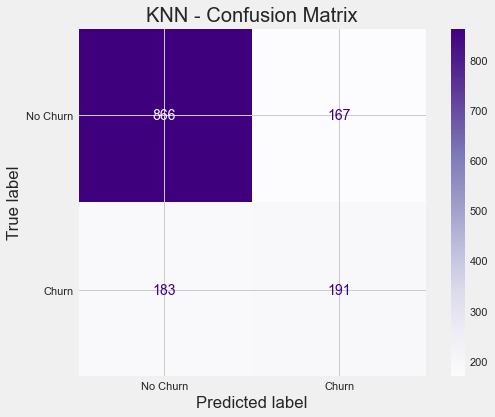

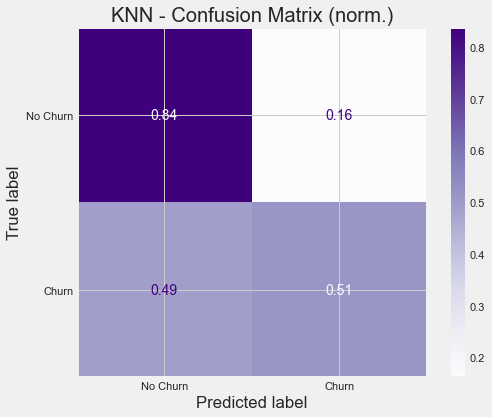

Accuracy Score Test: 0.7512437810945274
Accuracy Score Test: 0.8408888888888889(as comparison)



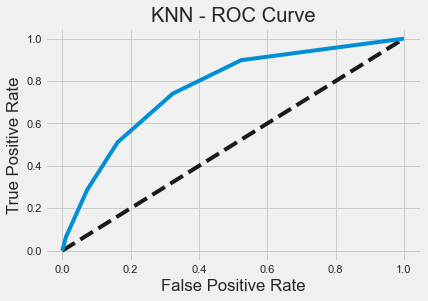

AUC Score (ROC): 0.7641299677487823

F1 Score: 0.5218579234972678 
AUC Score(PR): 0.5337587548717432



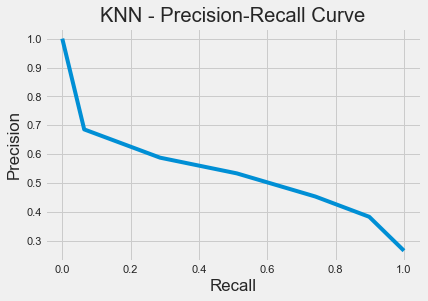

In [38]:
confusion_matrix_plot(X_train, y_train, X_test, y_test, knn, y_pred_knn, "KNN")
roc_curve_auc_score(X_test, y_test, y_pred_knn_prob, "KNN")
precision_recall_curve_and_scores(X_test, y_test, y_pred_knn, y_pred_knn_prob, "KNN")

Logistic Regression:

In [39]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [40]:
y_pred_logreg= logreg.predict(X_test)
y_pred_logreg_prob= logreg.predict_proba(X_test)

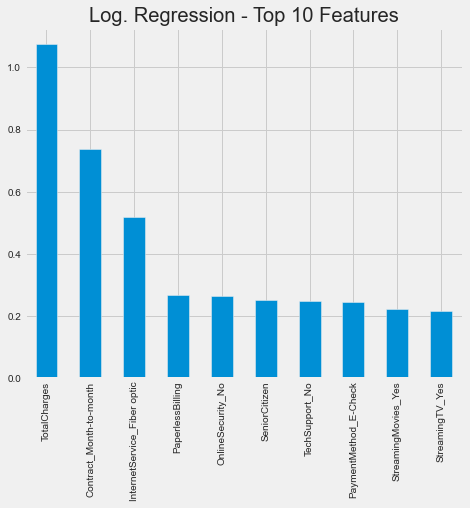

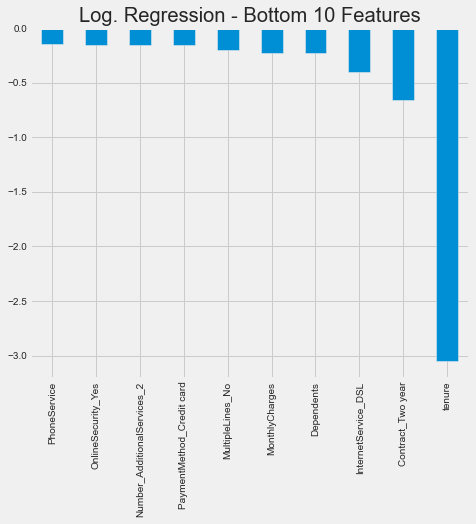

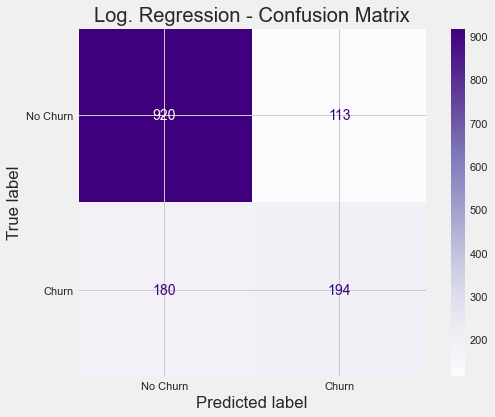

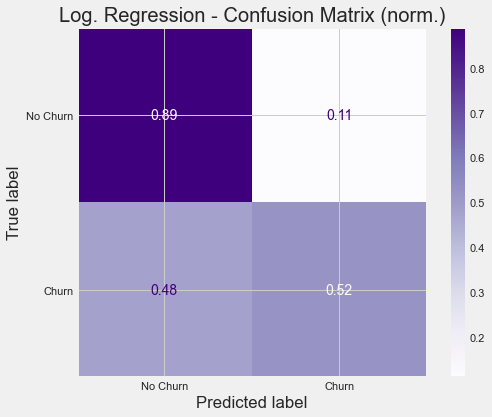

Accuracy Score Test: 0.7917555081734187
Accuracy Score Test: 0.8072888888888888(as comparison)



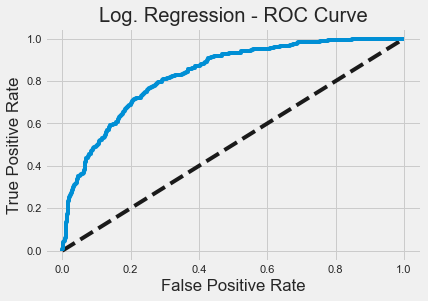

AUC Score (ROC): 0.8318432891065429

F1 Score: 0.5697503671071952 
AUC Score(PR): 0.6302875342653477



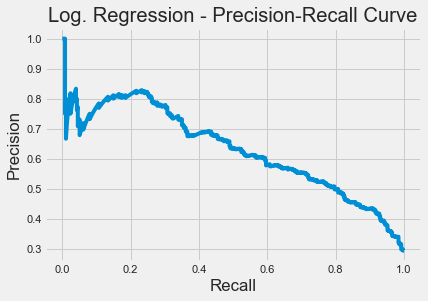

In [41]:
feature_weights(X1, logreg, "Log. Regression")
confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg, y_pred_logreg, "Log. Regression")
roc_curve_auc_score(X_test, y_test, y_pred_logreg_prob, "Log. Regression")
precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg, y_pred_logreg_prob, "Log. Regression")

## Model İyileştirme

K Nearest Neighbors (Optimized):

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid= {'n_neighbors':np.arange(1,30)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

y_pred_knn_tuned=knn_cv.predict(X_test)
y_pred_knn_tuned_prob=knn_cv.predict_proba(X_test)

print("KNN best number of neighbors: ", knn_cv.best_params_,'\n')

KNN best number of neighbors:  {'n_neighbors': 22} 



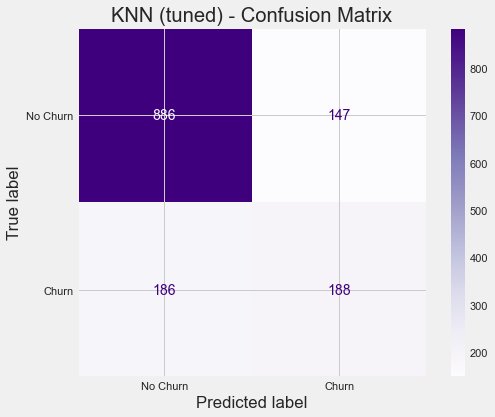

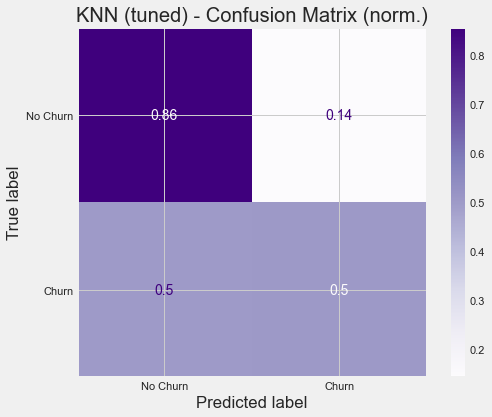

Accuracy Score Test: 0.7633262260127932
Accuracy Score Test: 0.8060444444444445(as comparison)



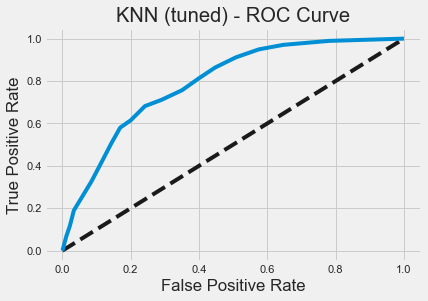

AUC Score (ROC): 0.7910167675272168

F1 Score: 0.530324400564175 
AUC Score(PR): 0.5372378582613967



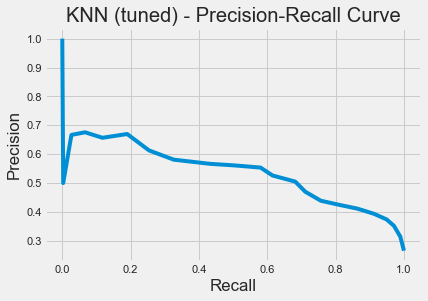

In [43]:
confusion_matrix_plot(X_train, y_train, X_test, y_test, knn_cv, y_pred_knn_tuned, 'KNN (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_knn_tuned_prob, 'KNN (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_knn_tuned, y_pred_knn_tuned_prob, 'KNN (tuned)')

Logistic Regression (Optimized):

In [44]:
param_grid_L1={'penalty':['l1','l2'], 'C':np.arange(.1,5,.1)}
logreg_tuned=LogisticRegression(solver='saga', max_iter=1000)
logreg_tuned_gs= GridSearchCV(logreg_tuned, param_grid_L1, cv=5)
logreg_tuned_gs.fit(X_train, y_train)

y_pred_logreg_tuned=logreg_tuned_gs.predict(X_test)
y_pred_logreg_tuned_prob=logreg_tuned_gs.predict_proba(X_test)


print('Logistic Regression - Best Parameters: ', logreg_tuned_gs.best_params_)

Logistic Regression - Best Parameters:  {'C': 0.9, 'penalty': 'l1'}


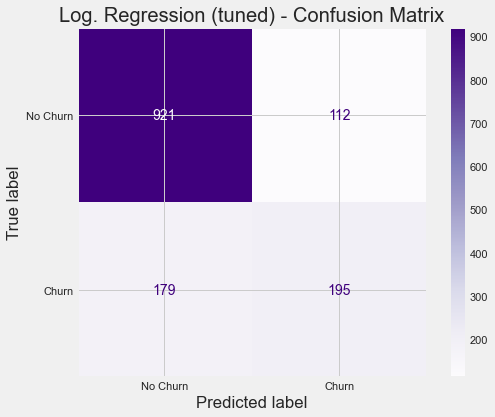

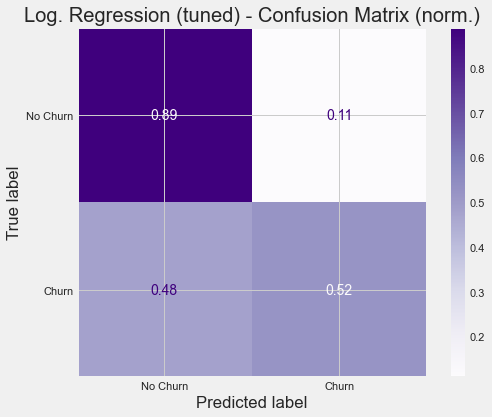

Accuracy Score Test: 0.7931769722814499
Accuracy Score Test: 0.8072888888888888(as comparison)



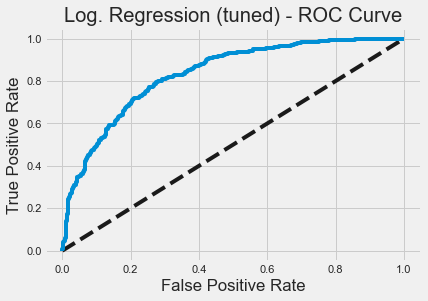

AUC Score (ROC): 0.8323506116342515

F1 Score: 0.5726872246696034 
AUC Score(PR): 0.6317189423495012



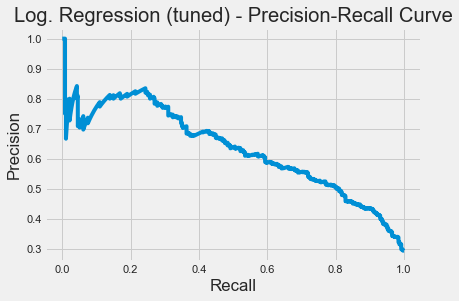

In [45]:
confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg_tuned_gs, y_pred_logreg_tuned, 'Log. Regression (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_logreg_tuned_prob, 'Log. Regression (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg_tuned, y_pred_logreg_tuned_prob, 'Log. Regression (tuned)')